# Netflix Stock Profile Visualization

In this project, you will act as a data visualization developer at Yahoo Finance! You will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 



For the purposes of the project, you will only visualize data for the year of 2017. Specifically, you will be in Create the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 


During this project, you will analyze, prepare, and plot data. Your visualizations will help the financial analysts asses the risk of the Netflix stock.


Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)

## Import the modules

In [17]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

## Load the datasets

In [2]:
netflix_stocks = pd.read_csv('NFLX.csv')
netflix_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


In [3]:
dowjones_stocks = pd.read_csv('DJI.csv')
dowjones_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


In [15]:
netflix_stocks_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


## Inspect the data

In [29]:
netflix_stocks.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

What year is represented in the data? Look out for the latest and earliest date.

In [30]:
netflix_stocks['Date'].min()
netflix_stocks['Date'].max()

data = netflix_stocks['Date'].min()
atpos = data.find('-')
year = data[:atpos]

print('The data represents year', year)

The data represents year 2017


In [34]:
print('Netflix stocks table')
netflix_stocks.describe()

Netflix stocks table


,Open,High,Low,Close,Adj Close,Volume
count,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01
mean,162.109168,174.188333,154.949168,168.079169,168.079169,1.420596e+08
std,22.427309,22.889526,19.519561,21.298918,21.298918,3.597514e+07
min,124.959999,143.460007,124.309998,140.710007,140.710007,9.143200e+07
25%,145.734997,152.212501,138.952503,149.010003,149.010003,1.141848e+08
50%,157.715004,175.744995,149.455002,168.890007,168.890007,1.360994e+08
75%,182.205002,192.247501,173.475002,184.235005,184.235005,1.667328e+08
max,197.240005,204.380005,184.320007,196.429993,196.429993,2.086578e+08


In [35]:
print('Dow Jones stocks table')
dowjones_stocks.describe()

Dow Jones stocks table


,Open,High,Low,Close,Adj Close,Volume
count,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01
mean,21576.639323,22090.152507,21334.914388,21937.621745,21937.621745,6.510095e+09
std,1332.002426,1458.599365,1321.564593,1503.771517,1503.771517,6.329533e+08
min,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,5.392630e+09
25%,20884.259278,21101.965332,20404.488281,20908.442383,20908.442383,6.176700e+09
50%,21211.425781,21732.415039,21136.760742,21620.375000,21620.375000,6.536170e+09
75%,22092.194824,22685.944824,21886.223144,22648.127441,22648.127441,7.010125e+09
max,24305.400391,24876.070313,23921.900391,24719.220703,24719.220703,7.335640e+09


In [36]:
print('Netflix stocks quaterly table')
netflix_stocks_quarterly.describe()

Netflix stocks quaterly table


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,165.402311,167.048725,163.487012,165.374263,165.374263,6.589608e+06
std,21.311867,21.594081,20.968138,21.295641,21.295641,4.117679e+06
min,124.959999,128.190002,124.309998,127.489998,127.489998,2.160500e+06
25%,144.564995,145.750000,143.329994,144.245002,144.245002,4.500900e+06
50%,162.910004,163.929993,160.550003,162.429993,162.429993,5.518600e+06
75%,185.915001,188.120002,183.209999,185.594994,185.594994,7.145300e+06
max,201.949997,204.380005,198.089996,202.679993,202.679993,4.158740e+07


## Rename columns 

In [37]:
netflix_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


In [12]:
netflix_stocks.rename(columns={"Adj Close": "Price"})
netflix_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


In [13]:
dowjones_stocks.rename(columns={"Adj Close": "Price"})
dowjones_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


In [16]:
netflix_stocks_quarterly.rename(columns={"Adj Close": "Price"})
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


## Candlesticks Chart with Moving Averages

In [21]:
ntfl = {
    'x': netflix_stocks['Date'],
    'open': netflix_stocks['Open'],
    'close': netflix_stocks['Close'],
    'high': netflix_stocks['High'],
    'low': netflix_stocks['Low'],
    'type': 'candlestick',
    'name': 'MSFT',
    'showlegend': False
}

# Calculate and define moving average of 30 periods
avg_30 = netflix_stocks.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50 = netflix_stocks.Close.rolling(window=50, min_periods=1).mean()


m_avg30 = {
    'x': netflix_stocks['Date'],
    'y': avg_30,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': '#E50914'
            },
    'name': 'Moving Average of 30 periods'
}


data = [ntfl, m_avg30]
# Config graph layout
layout = go.Layout({
    'title': {
        'text': 'Netflix Candlesticks Chart with Moving Averages',
        'font': {
            'size': 15
        }
    }
})

fig = go.Figure(data=data, layout=layout)

fig.show()

## Distribution of 2017 Netflix Stock Prices by Quarter

Text(0, 0.5, 'Business Quarters in 2017')

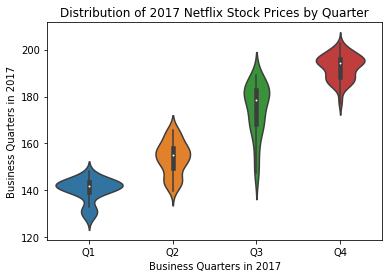

In [42]:
ax = sns.violinplot()
sns.violinplot(x = 'Quarter', y = 'Adj Close', data = netflix_stocks_quarterly)
ax.set_title("Distribution of 2017 Netflix Stock Prices by Quarter")
plt.xlabel("Business Quarters in 2017")
plt.ylabel("Business Quarters in 2017")

## The performance of the earnings per share (EPS)

Text(0.5, 1.0, 'Earnings Per Share in Cents')

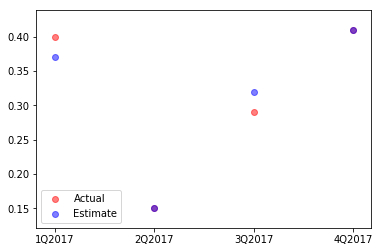

In [48]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]
plt.scatter(x_positions,earnings_actual, color='red', alpha=0.5)
plt.scatter(x_positions,earnings_estimate, color='blue', alpha=0.5)
plt.legend(["Actual", "Estimate"])
plt.xticks(x_positions, chart_labels)
ax.set_title("Earnings Per Share in Cents")

## Earnings and revenue reported by Netflix

([<matplotlib.axis.XTick at 0x1043019e8>,
 <a list of 4 Text xticklabel objects>)

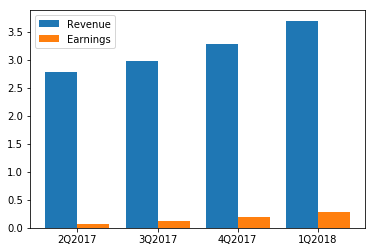

In [51]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Revenue
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars1_x = [t*element + w*n for element in range(d)]
plt.bar(bars1_x,revenue_by_quarter)


# Earnings
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars2_x = [t*element + w*n for element in range(d)]

plt.bar(bars2_x,earnings_by_quarter)

middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings"]

plt.legend(labels)
plt.xticks(middle_x, quarter_labels)

## Compare Netflix stock to the Dow Jones Industrial Average in 2017

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

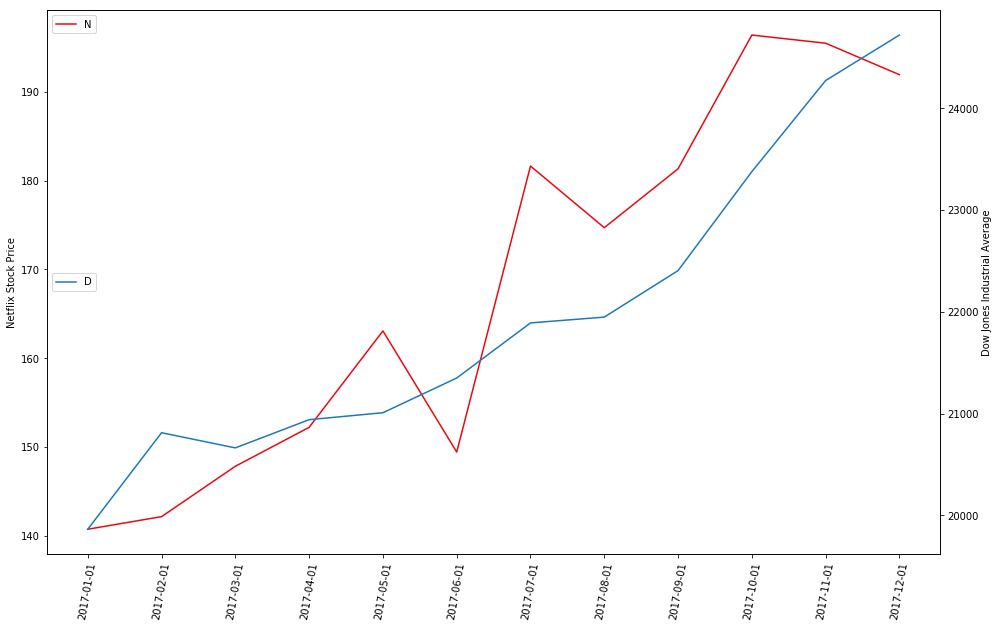

In [9]:
fig, ax1 = plt.subplots(figsize=(16,10))

ax1.plot(netflix_stocks['Date'], netflix_stocks['Adj Close'], color='#E50914')
ax1.set_ylabel("Netflix Stock Price")
ax1.legend('Netflix', loc="upper left")
plt.xticks(rotation=80)

ax2 = ax1.twinx() 
ax2.plot(dowjones_stocks['Date'], dowjones_stocks['Adj Close'])
ax2.legend('Dow Jones', loc="center left")
ax2.set_ylabel("Dow Jones Industrial Average")
plt.xticks(rotation=80)